# **Import Libraries and Dataset**

In [20]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [21]:
#Import library
import pandas as pd

wine = pd.read_csv('winequality-red.csv')

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [22]:
#Check null values
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# **Data Visualization**

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

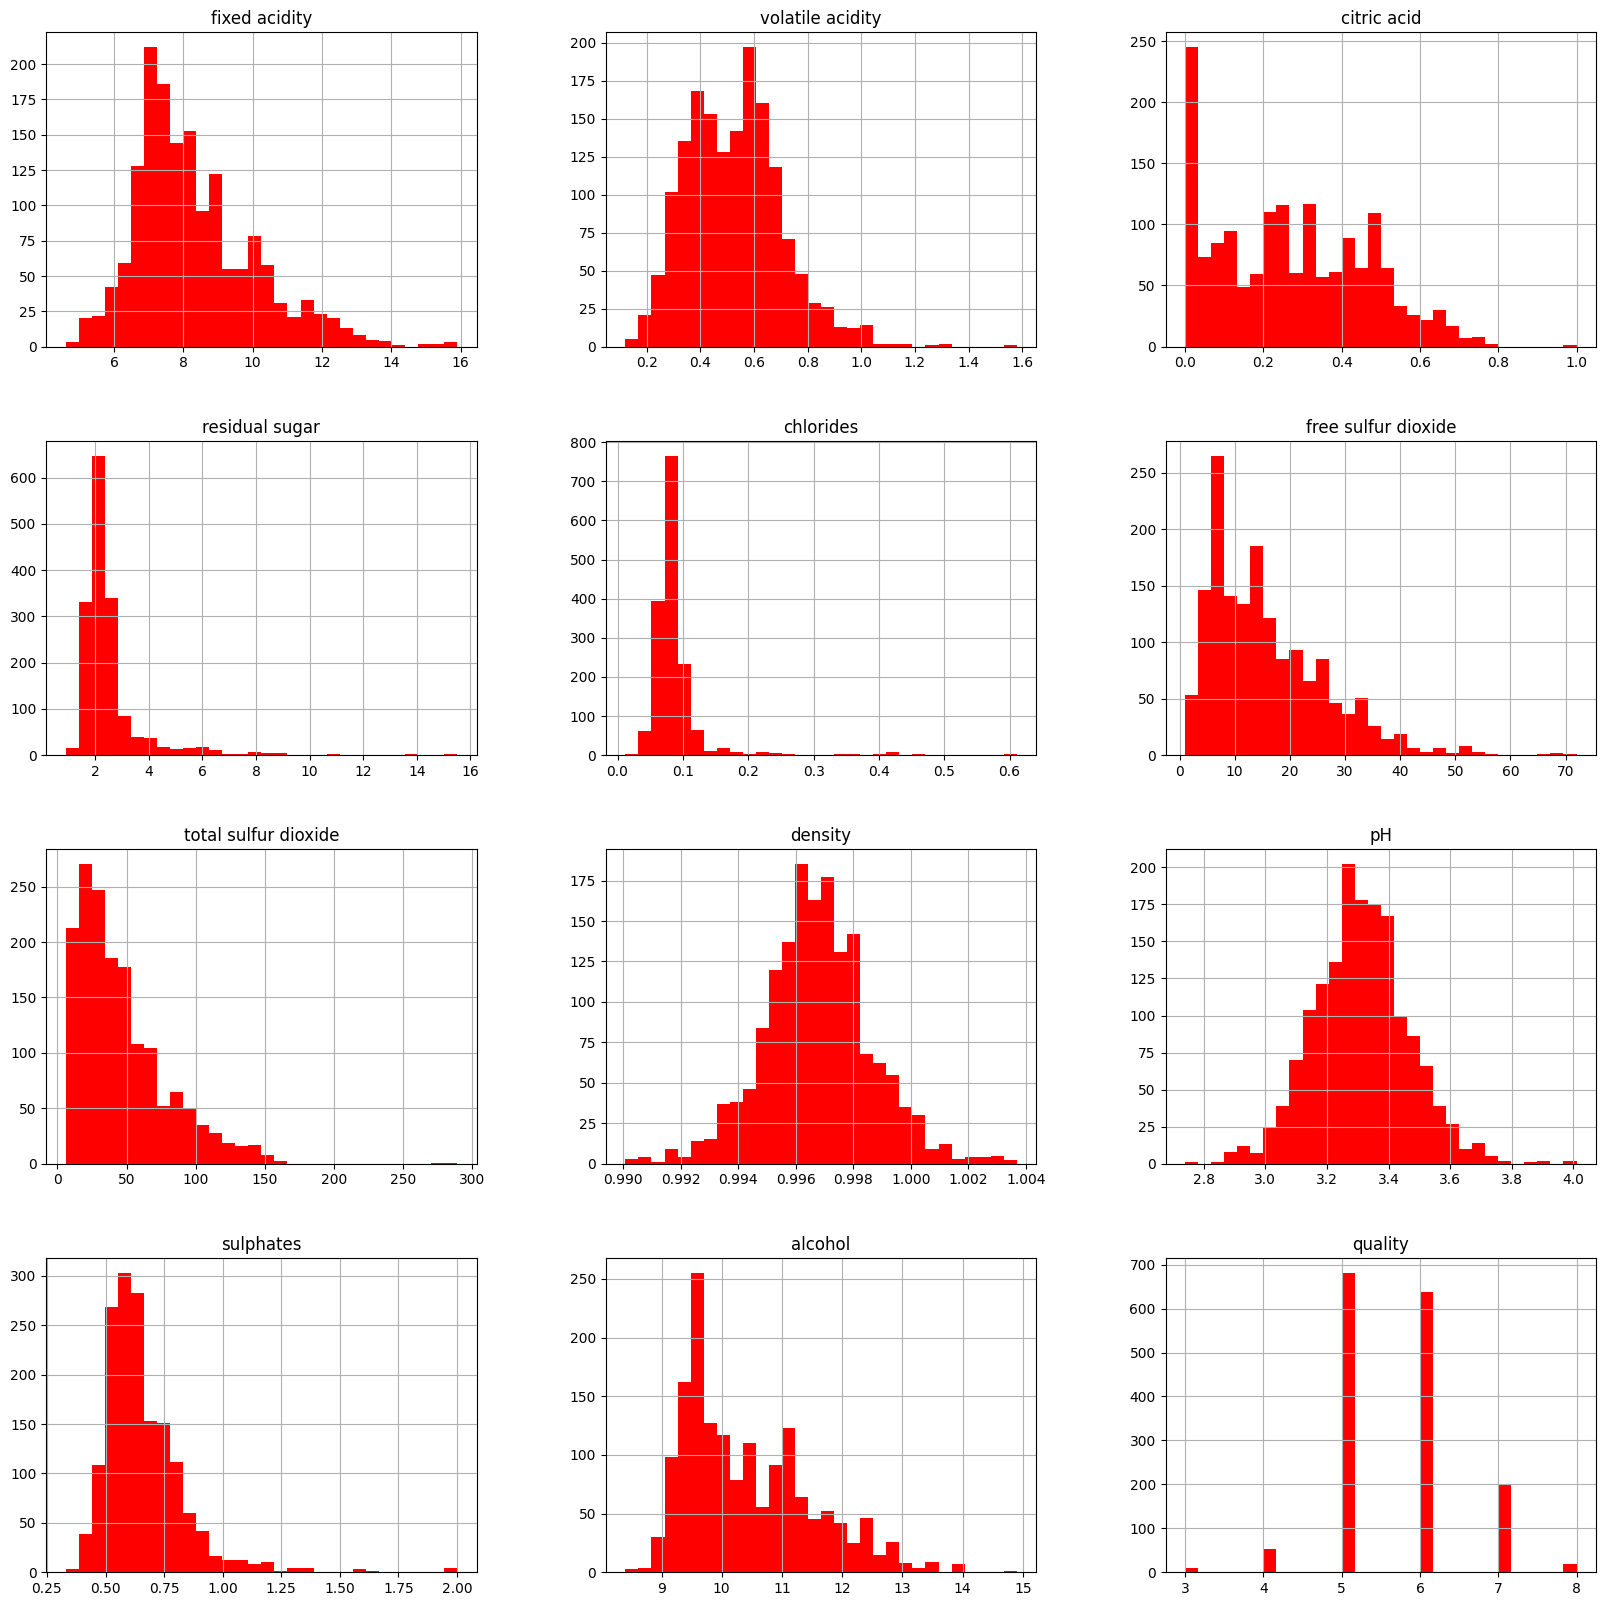

In [7]:
wine.hist(bins=30, figsize=(20,20), color='r')

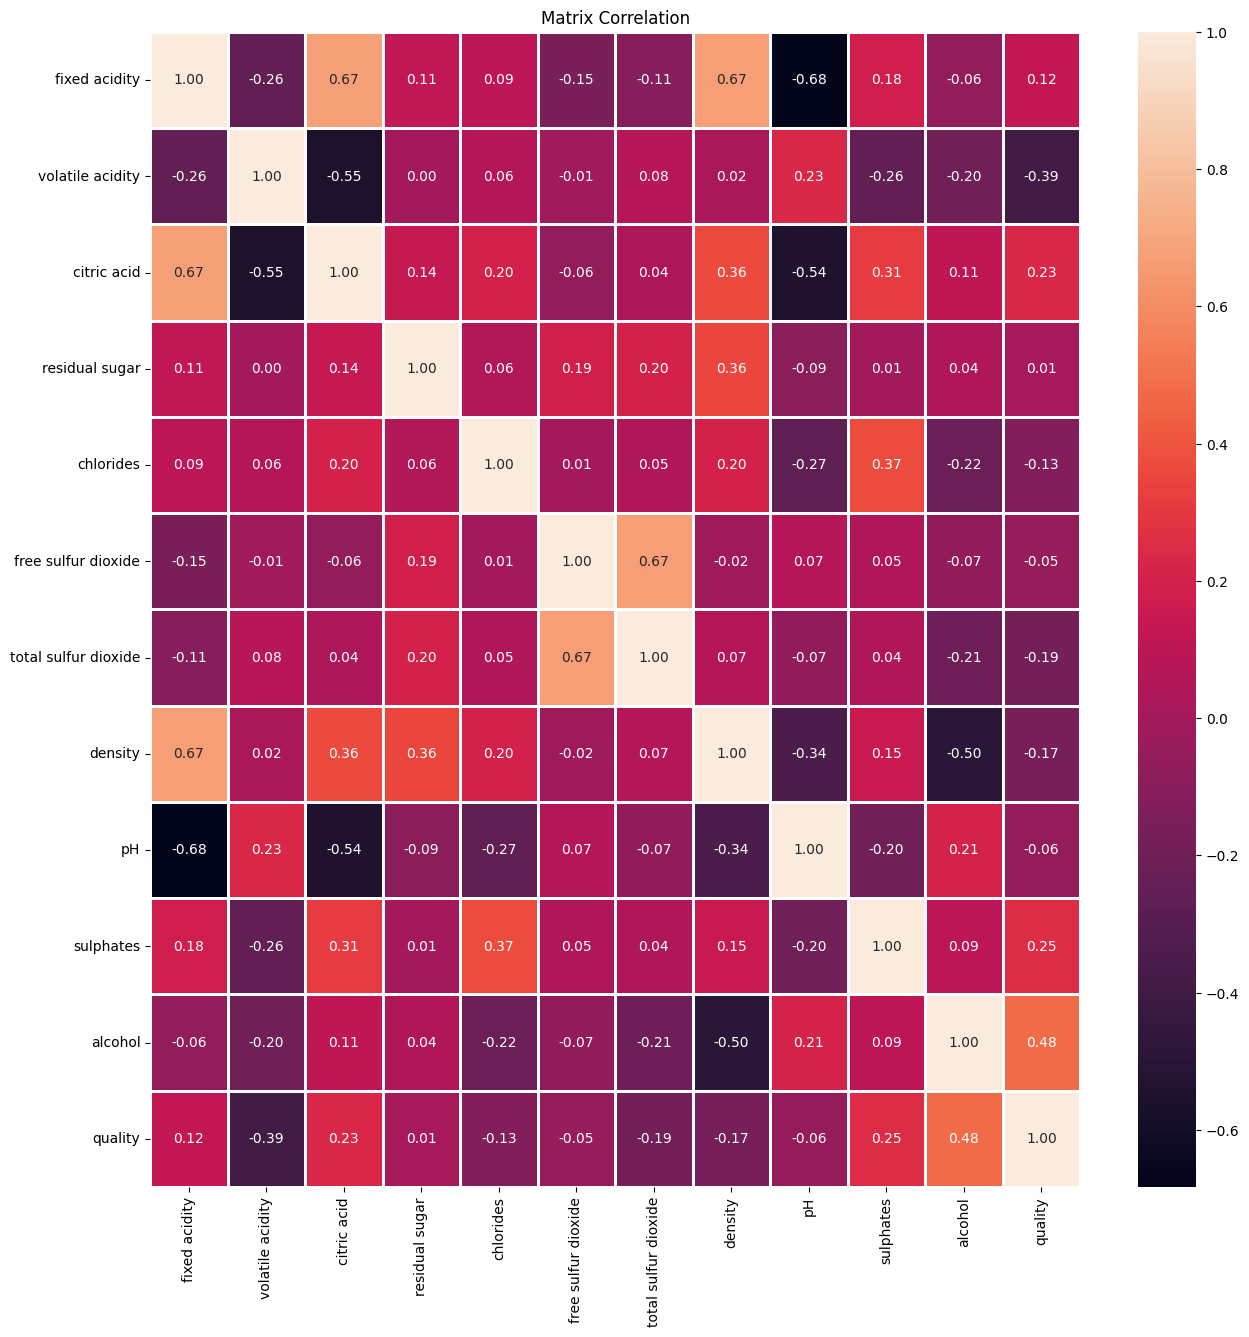

In [8]:
average_corr_matrix = wine.corr()

plt.figure(figsize=(15,15))
sns.heatmap(average_corr_matrix, annot=True, linewidth=1, fmt='.2f')
plt.title("Matrix Correlation")
plt.show()

<Axes: xlabel='quality', ylabel='fixed acidity'>

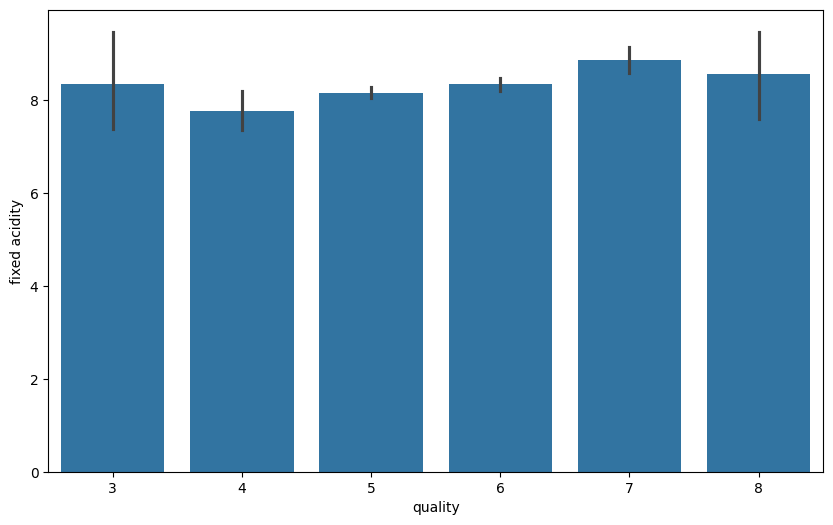

In [9]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)


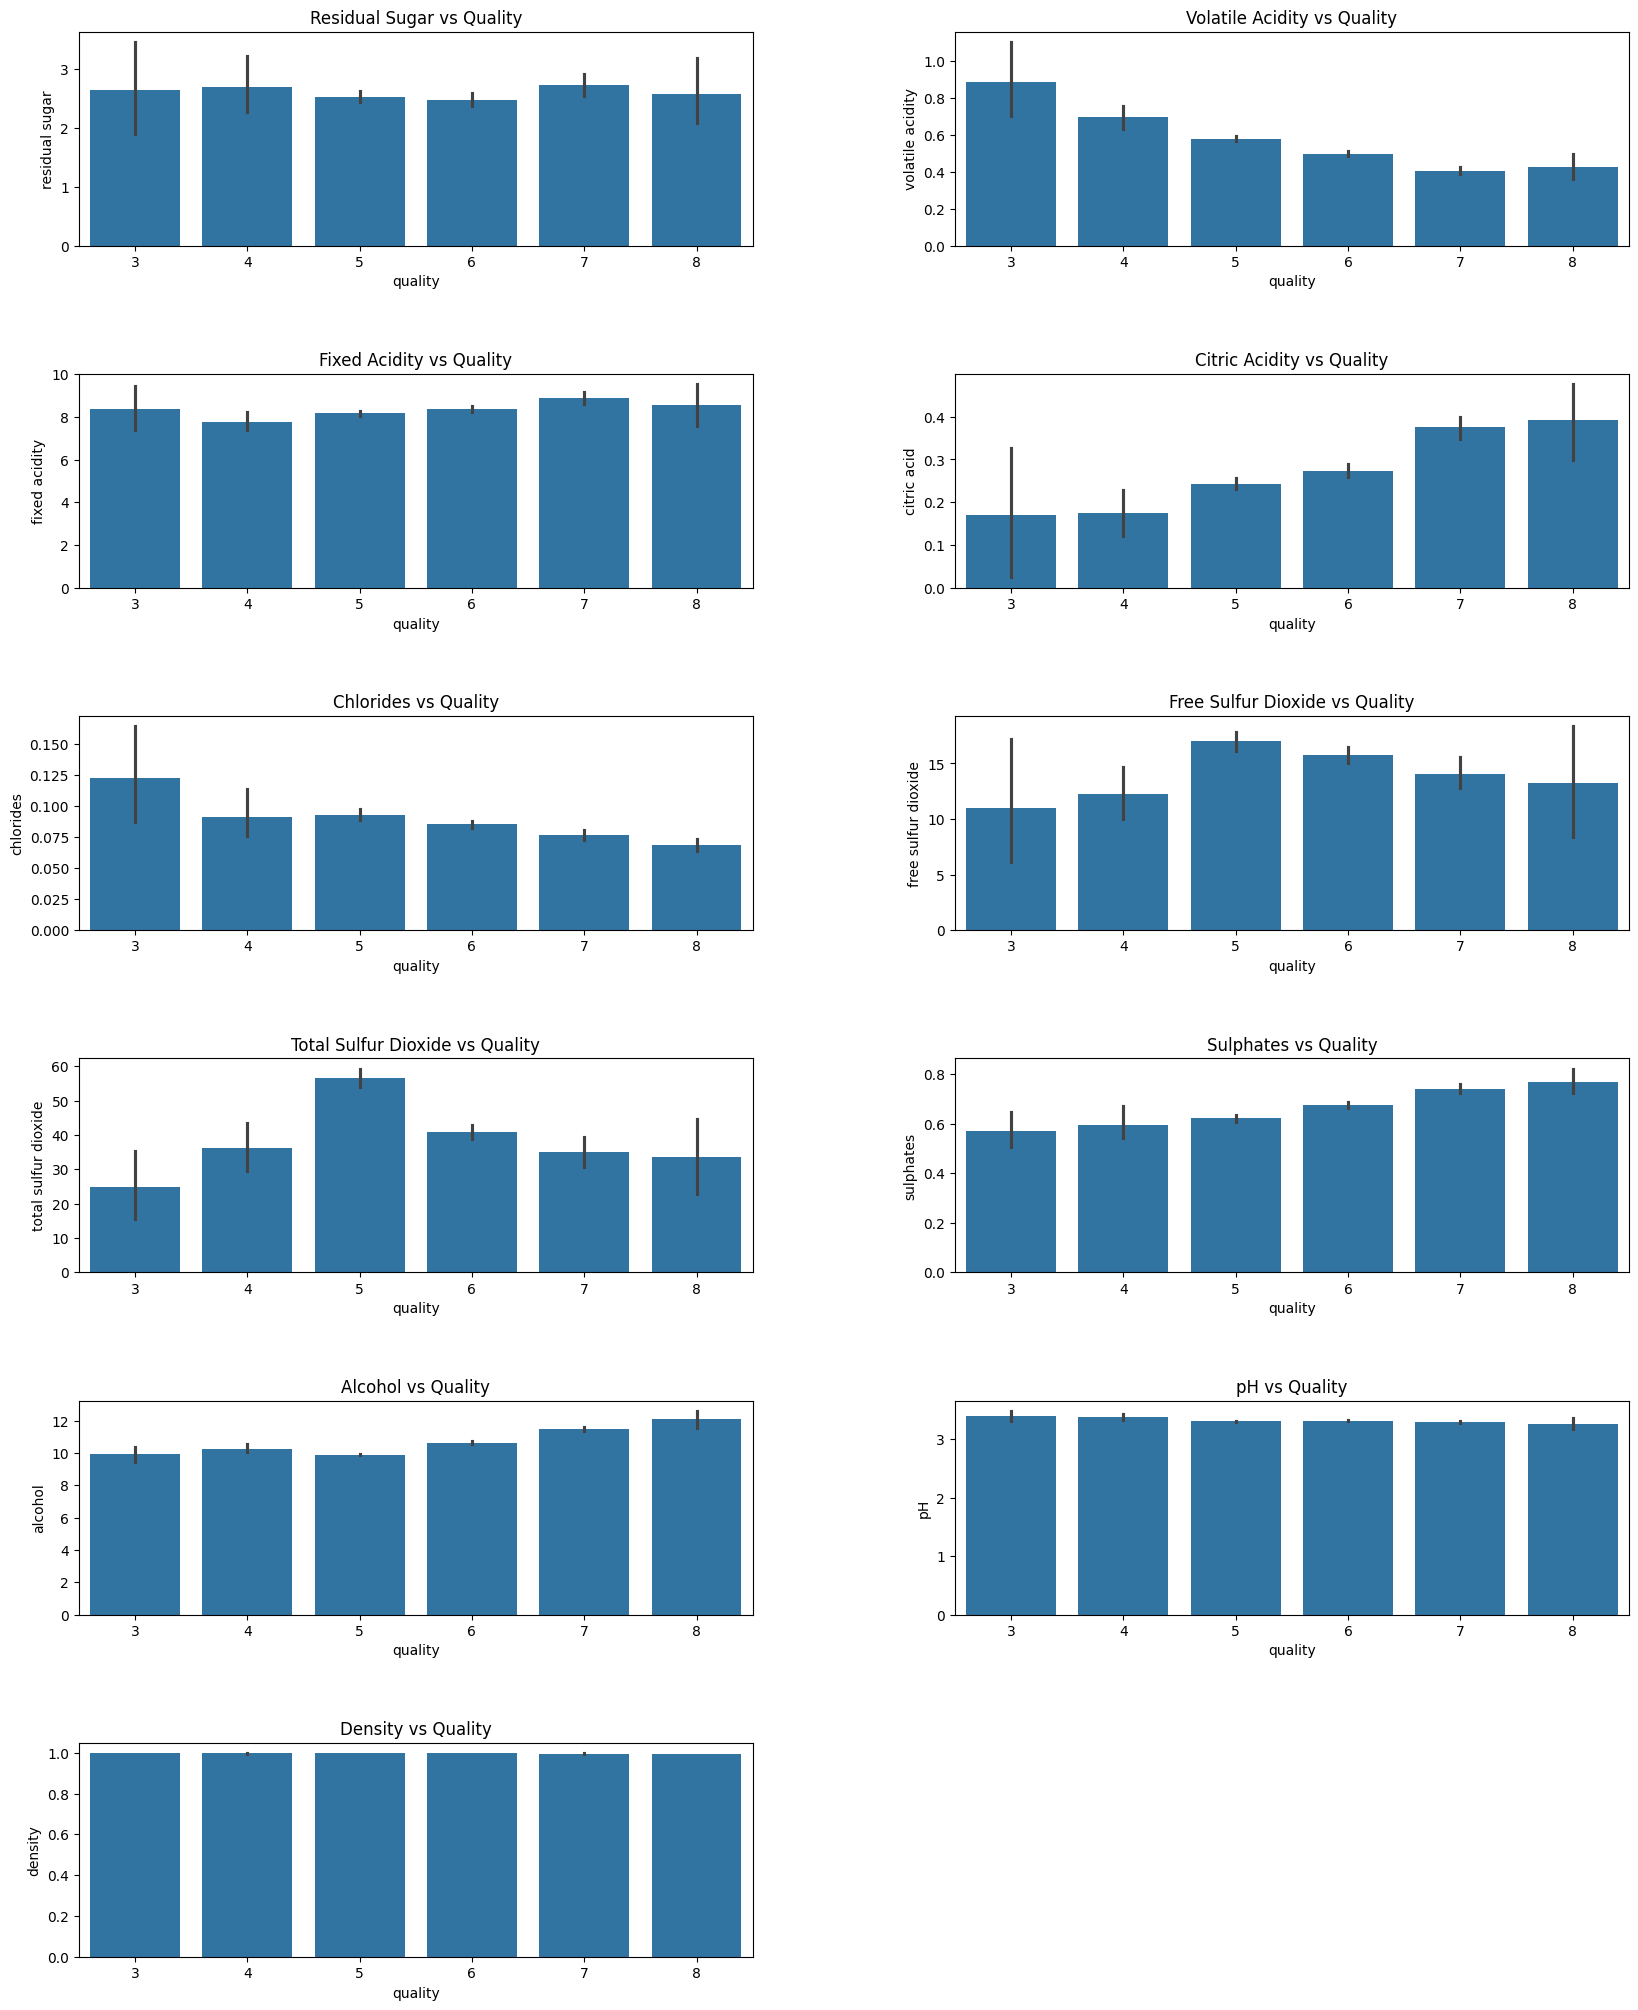

In [10]:
fig, axes = plt.subplots(6, 2, figsize=(20, 25))

plot_configs = [
    ('residual sugar', 'Residual Sugar vs Quality'),
    ('volatile acidity', 'Volatile Acidity vs Quality'),
    ('fixed acidity', 'Fixed Acidity vs Quality'),
    ('citric acid', 'Citric Acidity vs Quality'),
    ('chlorides', 'Chlorides vs Quality'),
    ('free sulfur dioxide', 'Free Sulfur Dioxide vs Quality'),
    ('total sulfur dioxide', 'Total Sulfur Dioxide vs Quality'),
    ('sulphates', 'Sulphates vs Quality'),
    ('alcohol', 'Alcohol vs Quality'),
    ('pH', 'pH vs Quality'),
    ('density', 'Density vs Quality')
]

axes = axes.flatten()

for idx, (feature, title) in enumerate(plot_configs):
    sns.barplot(x='quality', y=feature, data=wine, ax=axes[idx])
    axes[idx].set_title(title)

for i in range(len(plot_configs), len(axes)):
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.3, hspace=0.6)

plt.show()

# **Data Preprocessing**

In [23]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [24]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
wine['quality']

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): ['bad' < 'good']

In [25]:
label_quality = LabelEncoder()

#All bad wine becomes 0 and good becomes 1
wine['quality'] = label_quality.fit_transform(wine['quality'])
wine['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

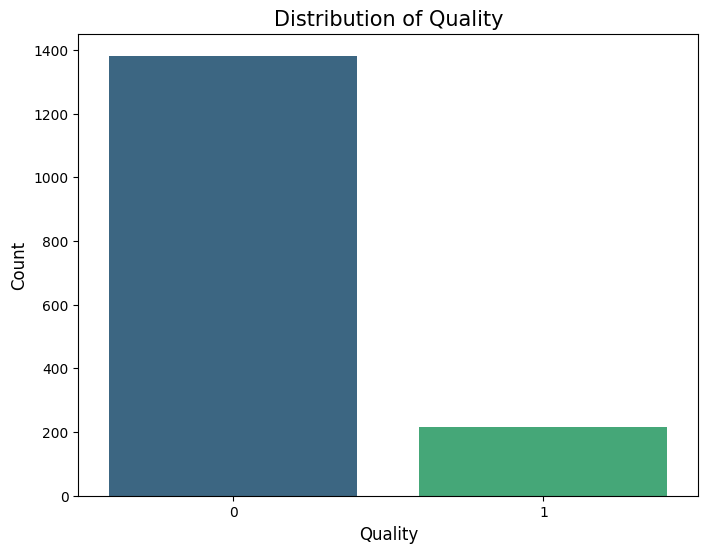

In [26]:
quality_counts = wine['quality'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=quality_counts.index, y=quality_counts.values, palette='viridis')

plt.xlabel('Quality', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Quality', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

# **Random Forest Classifier**

In [12]:
X = wine.drop('quality', axis = 1)
y = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.9000

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320


Confusion Matrix:
 [[264   9]
 [ 23  24]]


# **XGBoost Classifier**

In [ ]:
X = wine.drop('quality', axis = 1)
y = wine['quality']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
#Import libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

#Train the model on the training data
xgboost_model.fit(X_train, y_train)

#Make predictions on the test set
pred_xgboost = xgboost_model.predict(X_test)

print(classification_report(y_test, pred_xgboost))
print(f"Accuracy: {accuracy_score(y_test, pred_xgboost)}")
print(f"Recall: {recall_score(y_test, pred_xgboost)}")
print(f"Precision: {precision_score(y_test, pred_xgboost)}")
print(f"F1 Score: {f1_score(y_test, pred_xgboost)}")
print(f"ROC AUC: {roc_auc_score(y_test, pred_xgboost)}")

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       273
           1       0.76      0.62      0.68        47

    accuracy                           0.92       320
   macro avg       0.85      0.79      0.82       320
weighted avg       0.91      0.92      0.91       320

Accuracy: 0.915625
Recall: 0.6170212765957447
Precision: 0.7631578947368421
F1 Score: 0.6823529411764706
ROC AUC: 0.792027121814356
